In [46]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

One-Sample T-Test

A one-sample t-test checks whether a sample mean differs from the population mean. Let's create some dummy age data for the population of voters in the entire country and a sample of voters in Illinois and test the whether the average age of voters Illinois differs from the population:

In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [48]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(mu=35, size=150000)
population_ages2 = stats.poisson.rvs(mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

Illinois_ages1 = stats.poisson.rvs(mu=30, size=30)
Illinois_ages2 = stats.poisson.rvs(mu=10, size=20)
Illinois_ages = np.concatenate((Illinois_ages1, Illinois_ages2))

print( population_ages.mean() )
print( Illinois_ages.mean() )

25.000112
21.26


Notice that we used a slightly different combination of distributions to generate the sample data for Illinois, so we know that the two means are different. Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population. To conduct a one sample t-test, we can the stats.ttest_1samp() function

In [4]:
stats.ttest_1samp(a= Illinois_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655, pvalue=0.013118685425061782)

The test result shows the test statistic "t" is equal to -2.574. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

In [5]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [6]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.0095752344892088

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [7]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*

0.013121066545690117

*Note: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.
Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0.01311 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture population mean of 25:

In [8]:
sigma = Illinois_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = Illinois_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(18.369669080722179, 24.150330919277824)

On the other hand, since there is a 1.3% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it would capture the population mean:

In [9]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = Illinois_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(17.405479940921076, 25.114520059078927)

With a higher confidence level, we construct a wider confidence interval and increase the chances that it captures to true mean, thus making it less likely that we'll reject the null hypothesis. In this case, the p-value of 0.013 is greater than our significance level of 0.01 and we fail to reject the null hypothesis.

Two-Sample T-Test

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means. You can conduct a two-sample t-test by passing with the stats.ttest_ind() function. Let's generate a sample of voter age data for Wisconsin and test it against the sample we made earlier:

In [10]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

24.8


In [11]:
stats.ttest_ind(a= Illinois_ages,
                b= wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.090731043439577483)

The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

Paired T-Test

The basic two sample t-test is designed for testing differences between independent groups. In some cases, you might be interested in testing differences between samples of the same group at different points in time. For instance, a hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment. A paired t-test lets you check whether the means of samples from the same group differ.
We can conduct a paired t-test using the scipy function stats.ttest_rel(). Let's generate some dummy patient weight data and do a paired t-test:

In [52]:
np.random.seed(11)
before= stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)
weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})
weight_df.describe()

,weight_after,weight_before,weight_change
count,100.000000,100.000000,100.000000
mean,249.115171,250.345546,-1.230375
std,28.422183,28.132539,4.783696
min,165.913930,170.400443,-11.495286
25%,229.148236,230.421042,-4.046211
50%,251.134089,250.830805,-1.413463
75%,268.927258,270.637145,1.738673
max,316.720357,314.700233,9.759282


The summary shows that patients lost about 1.23 pounds on average after treatment. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level:

In [15]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

The p-value in the test output shows that the chances of seeing this large of a difference between samples due to chance is just over 1%.

Type I and Type II Error


The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.
Type I error describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.
Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.
Let's investigate these errors with a plot:

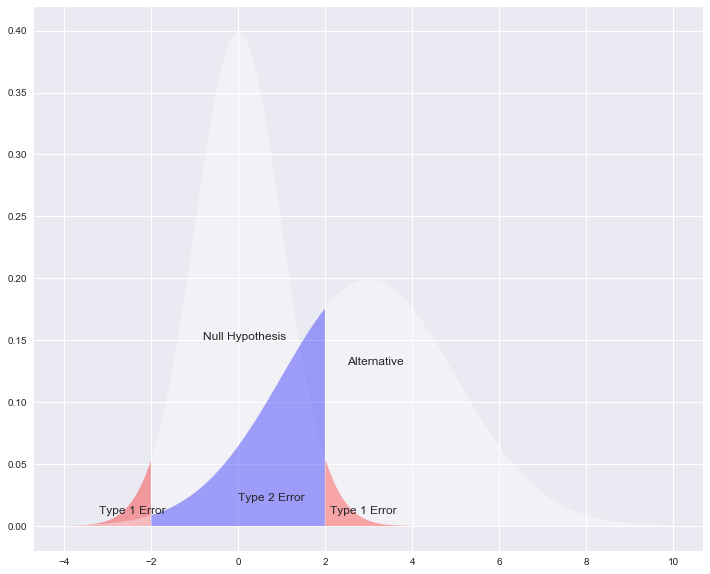

In [17]:
plt.figure(figsize=(12,10))
import seaborn as sns
sns.set()

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

In the plot above, the red areas indicate type I errors assuming the alternative hypothesis is not different from the null for a two-sided test with a 95% confidence level.

The blue area represents type II errors that occur when the alternative hypothesis is different from the null, as shown by the distribution on the right. Note that the Type II error rate is the area under the alternative distribution within the quantiles determined by the null distribution and the confidence level. We can calculate the type II error rate for the distributions above as follows:

In [18]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.29495606111232298

With the normal distributions above, we'd fail to reject the null hypothesis about 30% of the time because the distributions are close enough together that they have significant overlap.

The t-test is a powerful tool for investigating the differences between sample and population means. T-tests operate on numeric variables; next, we'll discuss statistical tests for categorical variables.

Chi-Squared Goodness-Of-Fit Test

In our study of t-tests, we introduced the one-way t-test to check whether a sample mean differs from the an expected (population) mean. The chi-squared goodness-of-fit test is an analog of the one-way t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution. For example, you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire U.S. population or whether the computer browser preferences of your friends match those of Internet uses as a whole.


When working with categorical data, the values themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning. Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.


Let's generate some fake demographic data for U.S. and Illinois and walk through the chi-square goodness of fit test to check whether they are different:

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [53]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

Illinois = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
Illinois_table = pd.crosstab(index=Illinois[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Illinois")
print(Illinois_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Illinois
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


Chi-squared tests are based on the so-called chi-squared statistic. You calculate the chi-squared statistic with the following formula:

sum((observed−expected)^2/expected)


In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category. Let's calculate the chi-squared statistic for our data to illustrate:

In [54]:
observed = Illinois_table
national_ratios = national_table/len(national)  # Get population ratios
expected = national_ratios * len(Illinois)   # Get expected counts
chi_squared_stat = (((observed-expected)**2)/expected).sum()
print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


*Note: The chi-squared test assumes none of the expected counts are less than 5.

Similar to the t-test where we compared the t-test statistic to a critical value based on the t-distribution to determine whether the result is significant, in the chi-square test we compare the chi-square test statistic to a critical value based on the chi-square distribution. The scipy library shorthand for the chi-square distribution is chi2. Let's use this knowledge to find the critical value for 95% confidence level and check the p-value of our result:

In [56]:
crit = stats.chi2.ppf(q = 0.95, df = 4)
print("Critical value")
print(crit)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=4)
print("P value")
print(p_value)

Critical value
9.48772903678
P value
[ 0.00113047]


*Note: we are only interested in the right tail of the chi-square distribution. 
    
Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.

You can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():

In [24]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([ 18.19480519]), pvalue=array([ 0.00113047]))

The test results agree with the values we calculated above.

Another example

In [57]:
catcnt_data = [16, 18, 16, 14, 10, 10]

stats.chisquare(catcnt_data)
# pvalue > 0.05, accept null hypothesis

stats.chisquare(catcnt_data, f_exp=np.repeat(14, 6))
# default value for f_exp is equal distribution

stats.chisquare(catcnt_data, f_exp=[10,10,10,18,18,18])
# pvalue < 0.05, reject null hypothesis, pattern does not fit distribution

stats.chisquare(catcnt_data, f_exp=np.repeat(14, 6), ddof=[2,3,4])
# pvalue differs for ddof, reject null hypothesis for ddof = 4

Power_divergenceResult(statistic=3.9999999999999996, pvalue=0.54941595135278032)

Power_divergenceResult(statistic=3.9999999999999996, pvalue=0.54941595135278032)

Power_divergenceResult(statistic=21.600000000000001, pvalue=0.00062365652404058078)

Power_divergenceResult(statistic=3.9999999999999996, pvalue=array([ 0.26146413,  0.13533528,  0.04550026]))

Chi-Squared Test of Independence

Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another. For instance, the month you were born probably doesn't tell you anything about which web browser you use, so we'd expect birth month and browser preference to be independent. On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.

The chi-squared test of independence tests whether two categorical variables are independent. The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race and religion. Let's generate some fake voter polling data and perform a test of independence:

In [58]:
np.random.seed(10)
# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)
# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)
voters = pd.DataFrame({"race":voter_race, 
                       "party":voter_party})
voter_tab = pd.crosstab(voters.race, voters.party, margins = True)
voter_tab.columns = ["democrat","independent","republican","row_totals"]
voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]
observed = voter_tab.ix[0:5,0:3]   # Get table without totals for later use
voter_tab

C:\Users\gmanish\AppData\Local\Continuum\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


,democrat,independent,republican,row_totals
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
col_totals,397,186,417,1000


Note that we did not use the race data to inform our generation of the party data so the variables are independent.

For a test of independence, we use the same chi-squared formula that we used for the goodness-of-fit test. The main difference is we have to calculate the expected counts of each cell in a 2-dimensional table instead of a 1-dimensional table. To get the expected count for a cell, multiply the row total for that cell by the column total for that cell and then divide by the total number of observations. We can quickly get the expected counts for all cells in the table by taking the row totals and column totals of the table, performing an outer product on them with the np.outer() function and dividing by the number of observations:

In [59]:
expected =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.ix["col_totals"][0:3]) / 1000
expected = pd.DataFrame(expected)
expected.columns = ["democrat","independent","republican"]
expected.index = ["asian","black","hispanic","other","white"]
expected

,democrat,independent,republican
asian,23.820,11.160,25.020
black,61.138,28.644,64.218
hispanic,99.647,46.686,104.667
other,15.086,7.068,15.846
white,197.309,92.442,207.249


Now we can follow the same steps we took before to calculate the chi-square statistic, the critical value and the p-value:

In [60]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

7.169321280162059


*Note: We call .sum() twice: once to get the column sums and a second time to add the column sums together, returning the sum of the entire 2D table.

In [61]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *
print("Critical value")
print(crit)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                            df=8)
print("P value")
print(p_value)

Critical value
15.5073130559
P value
0.518479392949


*Note: The degrees of freedom for a test of independence equals the product of the number of categories in each variable minus 1. In this case we have a 5x3 table so df = 4x2 = 8.
    
As with the goodness-of-fit test, we can use scipy to conduct a test of independence quickly. Use stats.chi2_contingency() function to conduct a test of independence automatically given a frequency table of observed counts:

In [62]:
stats.chi2_contingency(observed= observed)

(7.1693212801620589,
 0.51847939294884204,
 8,
 array([[  23.82 ,   11.16 ,   25.02 ],
        [  61.138,   28.644,   64.218],
        [  99.647,   46.686,  104.667],
        [  15.086,    7.068,   15.846],
        [ 197.309,   92.442,  207.249]]))

The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.

As expected, given the high p-value, the test result does not detect a significant relationship between the variables.

In [43]:
#Another example from https://medium.com/@kangeugine/hypothesis-test-21795f788f7d
dfct = pd.crosstab(pd.Series(['Nighthawks', 'Scouts', 'Dragoons']) \
                   .sample(100, random_state=1, replace=True) \
                   .reset_index(drop=True),
                   pd.Series(['1st', '2nd', '3rd']) \
                   .sample(100, random_state=2, replace=True) \
                   .reset_index(drop=True))
dfct
chi2, p, dof, exp = stats.chi2_contingency(dfct)
# p > 0.05, accept null hypothesis, two variables are independent
chi2
p
dof
exp
dfct = pd.crosstab(pd.Series(['Nighthawks', 'Scouts', 'Dragoons']) \
                   .sample(100, random_state=1, replace=True) \
                   .reset_index(drop=True),
                   pd.Series(['1st', '2nd', '3rd']) \
                   .sample(100, random_state=1, replace=True) \
                   .reset_index(drop=True))
dfct
chi2, p, dof, exp = stats.chi2_contingency(dfct)
# p < 0.05, reject null hypothesis, two variables are NOT independent
chi2
p
dof
exp

col_0,1st,2nd,3rd
row_0,,,
Dragoons,10,9,9
Nighthawks,13,8,13
Scouts,9,12,17


2.5517342564556182

0.63539654595311879

4

array([[  8.96,   8.12,  10.92],
       [ 10.88,   9.86,  13.26],
       [ 12.16,  11.02,  14.82]])

col_0,1st,2nd,3rd
row_0,,,
Dragoons,0,0,28
Nighthawks,34,0,0
Scouts,0,38,0


200.0

3.7572767357810602e-42

4

array([[  9.52,  10.64,   7.84],
       [ 11.56,  12.92,   9.52],
       [ 12.92,  14.44,  10.64]])

Chi-squared tests provide a way to investigate differences in the distributions of categorical variables with the same categories and the dependence between categorical variables. In the next lesson, we'll learn about a third statistical inference test, the analysis of variance, that lets us compare several sample means at the same time.

The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time. For example, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable. We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

One-Way ANOVA

The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. It essentially answers the question: do any of the group means differ from one another? We won't get into the details of carrying out an ANOVA by hand as it involves more calculations than the t-test, but the process is similar: you go through several calculations to arrive at a test statistic and then you compare the test statistic to a critical value based on a probability distribution. In the case of the ANOVA, you use the "f-distribution".

The scipy library has a function for carrying out one-way ANOVA tests called scipy.stats.f_oneway(). Let's generate some fake voter age and demographic data and use the ANOVA to compare average ages across the groups:

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [31]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

The test output yields an F-statistic of 1.774 and a p-value of 0.1317, indicating that there is no significant difference between the means of each group.

Now let's make new age data where the group means do differ and run a second ANOVA:

In [32]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

The test result suggests the groups don't have the same sample means in this case, since the p-value is significant at a 99% confidence level. We know that it is the white voters who differ because we set it up that way in the code, but when testing real data, you may not know which group(s) caused the the test to throw a positive result. To check which groups differ after getting a positive ANOVA result, you can perform a follow up test or "post-hoc test".

One post-hoc test is to perform a separate t-test for each pair of groups. You can perform a t-test between all pairs using by running each pair through the stats.ttest_ind() we covered in the lesson on t-tests:

In [33]:
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))

asian black
Ttest_indResult(statistic=0.83864469097479799, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.67046690042407264)
asian other
Ttest_indResult(statistic=0.97952847396359999, pvalue=0.32988775000951509)
asian white
Ttest_indResult(statistic=-2.3181088112522881, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.051561971719525937)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.77957701111176592)
black white
Ttest_indResult(statistic=-5.3793038812818352, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.00046412986490666839)
other white
Ttest_indResult(statistic=-3.7638093220778721, pvalue=0.00018490576317593065)


The p-values for each pairwise t-test suggest mean of white voters is likely different from the other groups, since the p-values for each t-test involving the white group is below 0.05. Using unadjusted pairwise t-tests can overestimate significance, however, because the more comparisons you make, the more likely you are to come across an unlikely result due to chance. We can adjust for this multiple comparison problem by dividing the statistical significance level by the number of comparisons made. In this case, if we were looking for a significance level of 5%, we'd be looking for p-values of 0.05/10 = 0.005 or less. This simple adjustment for multiple comparisons is known as the Bonferroni correction.

The Bonferroni correction is a conservative approach to account for the multiple comparisons problem that may end up rejecting results that are actually significant. Another common post hoc-test is Tukey's test. You can carry out Tukey's test using the pairwise_tukeyhsd() function in the statsmodels.stats.multicomp library:

group1,group2,meandiff,lower,upper,reject
asian,black,-0.8032,-3.4423,1.836,False
asian,hispanic,0.4143,-2.1011,2.9297,False
asian,other,-1.0645,-4.2391,2.11,False
asian,white,1.9547,-0.4575,4.3668,False
black,hispanic,1.2175,-0.386,2.821,False
black,other,-0.2614,-2.7757,2.253,False
black,white,2.7579,1.3217,4.194,True
hispanic,other,-1.4789,-3.863,0.9053,False
hispanic,white,1.5404,0.3468,2.734,True
other,white,3.0192,0.7443,5.2941,True


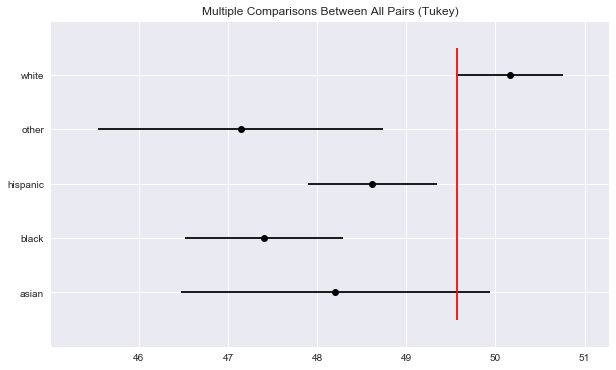

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

The output of the Tukey test shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. In this case, the test suggests we reject the null hypothesis for 3 pairs, with each pair including the "white" category. This suggests the white group is likely different from the others. The 95% confidence interval plot reinforces the results visually: only 1 other group's confidence interval overlaps the white group's confidence interval.
    
Wrap Up

The ANOVA test lets us check whether a numeric response variable varies according to the levels of a categorical variable. Python's scipy library makes it easy to perform an ANOVA without diving too deep into the details of the procedure.

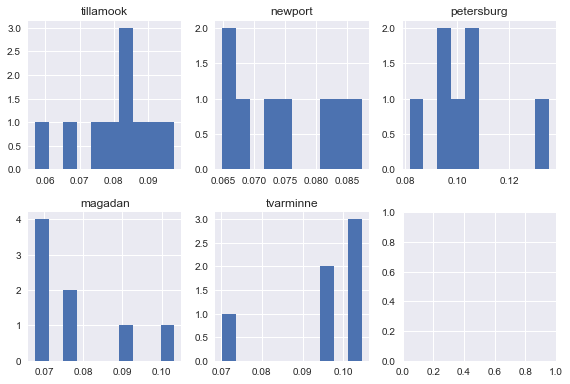

F_onewayResult(statistic=7.1210194716424473, pvalue=0.00028122423145345439)

In [35]:
import matplotlib.pyplot as plt

tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

n_bins = 10
fig, axes = plt.subplots(nrows=2, ncols=3)

axes[0][0].hist(tillamook, n_bins)
axes[0][0].set_title('tillamook')
axes[0][1].hist(newport, n_bins)
axes[0][1].set_title('newport')
axes[0][2].hist(petersburg, n_bins)
axes[0][2].set_title('petersburg')
axes[1][0].hist(magadan, n_bins)
axes[1][0].set_title('magadan')
axes[1][1].hist(tvarminne, n_bins)
axes[1][1].set_title('tvarminne')

fig.tight_layout()
plt.show()

stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)
# pvalue < 0.05, at least one group does not have the same mean